                 state       district      market              commodity  \
0  Andaman and Nicobar  South Andaman  Port Blair             Amaranthus   
1  Andaman and Nicobar  South Andaman  Port Blair         Banana - Green   
2  Andaman and Nicobar  South Andaman  Port Blair  Bhindi(Ladies Finger)   
3  Andaman and Nicobar  South Andaman  Port Blair           Bitter gourd   
4  Andaman and Nicobar  South Andaman  Port Blair           Black pepper   

          variety  arrival_date  arrival_month  arrival_year  min_price  \
0      Amaranthus             3              4          2019       6000   
1  Banana - Green             3              4          2019       4500   
2          Bhindi             3              4          2019       6000   
3           Other             3              4          2019       6000   
4           Other             3              4          2019     110000   

   max_price  modal_price  
0       8000         7000  
1       5500         5000  
2       

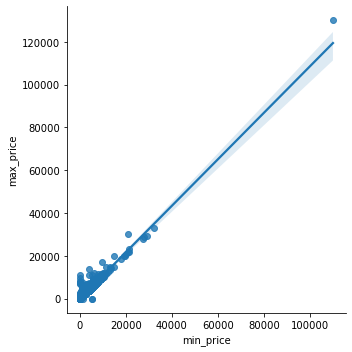

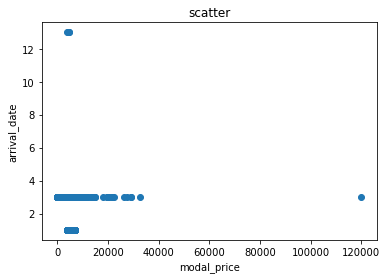

r2 score = 0.83


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as ms

data=pd.read_csv('/home/saran.p@censanext.local/Downloads/bengalgram - Sheet1 (2).csv')
print(data.head())
#print(data.info())
#print(data.isnull())

x = data[['min_price', 'max_price']]
y = data[['modal_price']]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

regr=LinearRegression()
regr.fit(x_train,y_train)
y_pred=regr.predict(x_test)
print(regr.score(x_train,y_train))


x2=float(input('Minimum Price'))
x3=float(input('Maximum Price'))
user_input = pd.DataFrame({'min_price': [x2], 'max_price': [x3]})
prediction = regr.predict(user_input)
print('The predicted value of modal_price is:', prediction[0])

combined = np.concatenate([[ x2, x3]])
median= np.median(combined)
print("Median of price:", median)

print(data[['min_price', 'max_price']])
sns.lmplot(x="min_price",y="max_price",data=data)
plt.show()

#plt.hist()
plt.scatter(data['modal_price'],data['arrival_date'])
plt.title('scatter')
plt.ylabel('arrival_date')
plt.xlabel('modal_price')
#plt.colorbar()
plt.show()
print("r2 score =",round(ms.r2_score(y_test,y_pred),2))